<a href="https://colab.research.google.com/github/SUNNYTHAKURCODE/MACHINELEARNING/blob/master/Decision_tree_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AIM: TO IMPLEMENT DECISION TREE CLASSIFIER**


DATASET: IRIS DATASET 

Theory :





A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.


How Decision Tree Algorithm works:

1.   Select the best attribute using Attribute Selection Measures(ASM) to split the records.
2.   Make that attribute a decision node and breaks the dataset into smaller subsets.
3.   Starts tree building by repeating this process recursively for each child until one of the condition will match:

*   All the tuples belong to the same attribute value.
*   There are no more remaining attributes.
*   There are no more instances.

Attribute Selection is based on following two methods 


1)	Entropy



The root node (the first decision node) partitions the data using the feature that provides the most information gain.  Information gain tells us how important a given attribute of the feature vectors is. It is calculated as:

Information Gain=entropy(parent)–[average entropy(children)]

Where entropy is a common measure of target class impurity, given as:




 image.png

where i  target classes.


2)	Gini Impurity

Gini Impurity is another measure of impurity and is calculated as follows:


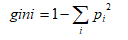



where i is each of target class.

Gini impurity is computationally faster as it doesn’t require calculating logarithmic functions, though in reality which of the two methods is used rarely makes too much of a difference.


In [0]:
#import mumpy pandas and sklearn python packages
import numpy as np 
import pandas as pd
import sklearn

In [15]:
# link google drive to google colab 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# change the working directory of your code on google drive
%cd/content/drive/My Drive/Colab Notebooks/Python Practice

/content/drive/My Drive/Colab Notebooks/Python Practice


In [0]:
# reading the IRIS dataset using pd.read_filetype(r"file name")
#printing the data 
my_data=pd.read_csv(r"Iris.csv")
print(my_data[0:5])

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [18]:
# creating the training set by taking data set of different types and concatenate them 
train_set=pd.concat([my_data[0:40],my_data[50:90],my_data[100:140]],join='outer',)
print(train_set[0:5])

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [19]:
#creating the test dataset 
test_set=pd.concat([my_data[40:50],my_data[90:100],my_data[140:150]],join='outer',)
print(test_set[0:5])

    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
40  41            5.0           3.5            1.3           0.3  Iris-setosa
41  42            4.5           2.3            1.3           0.3  Iris-setosa
42  43            4.4           3.2            1.3           0.2  Iris-setosa
43  44            5.0           3.5            1.6           0.6  Iris-setosa
44  45            5.1           3.8            1.9           0.4  Iris-setosa


In [0]:
# seperating the feautre matrix X and labelled vector(classes) Y  
train_set_x=train_set[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_set_y=train_set[['Species']]

test_set_x=test_set[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_set_y=test_set[['Species']]

In [21]:
# import DECISION TREE CLASSIFIER from TREE classifier of sklearn
# Crietria use for creating decision tree is entropy 
# the no of level(depth) of tree is 5
# now fit the classifier on training dataset 
# predict the labels of test feautre and then compare with the original labels 
from sklearn.tree import DecisionTreeClassifier
flower_tree=DecisionTreeClassifier(criterion="entropy",max_depth=5)

print(flower_tree)
flower_tree.fit(train_set_x,train_set_y)

predict_tree=flower_tree.predict(test_set_x)
print(predict_tree[0:5]) # predicted output labels of test dataset 
print(test_set_y[0:5])   # actual label of test dataset 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
        Species
40  Iris-setosa
41  Iris-setosa
42  Iris-setosa
43  Iris-setosa
44  Iris-setosa


In [22]:
# metrics module includes score functions, performance metrics
from sklearn import metrics
print("\ndecision tree accuracy:",metrics.accuracy_score(test_set_y,predict_tree))


decision tree accuracy: 1.0


In [23]:
# Installing six package for string input and output 
!pip install six

In [0]:
# importing packages use for visualization of decision tree 
# graphviz Assemble DOT source code and render it with Graphviz.
# pydotplus module is for PyDotPlus module entry.
# six Utilities for writing code that runs on Python 2 and 3

from sklearn.externals.six import StringIO
from sklearn import tree
import pydotplus
import graphviz
from IPython.display import Image  


featureNames = my_data.columns[0:4]
targetNames = my_data['Species'].unique().tolist()
dot_data = StringIO()  #Text I/O implementation using an in-memory buffer.

#tree.export_graphviz(decision_tree, out_file=None, max_depth=None,
#                   feature_names=None, class_names=None, label='all',
#                   filled=False, leaves_parallel=False, impurity=True,
#                  node_ids=False, proportion=False, rotate=False,
#                 rounded=False, special_characters=False, precision=3):
#This function generates a GraphViz representation of the decision tree,
#which is then written into `out_file`

dot_data = tree.export_graphviz(flower_tree, out_file=None ,
                                feature_names=featureNames,
                                class_names=targetNames,
                                filled=True, rotate=False)
#Load graph as defined by data in DOT format.
#The data is assumed to be in DOT format. 
#It will be parsed and a Dot class will be returned, representing the graph.
graph=pydotplus.graph_from_dot_data(dot_data)


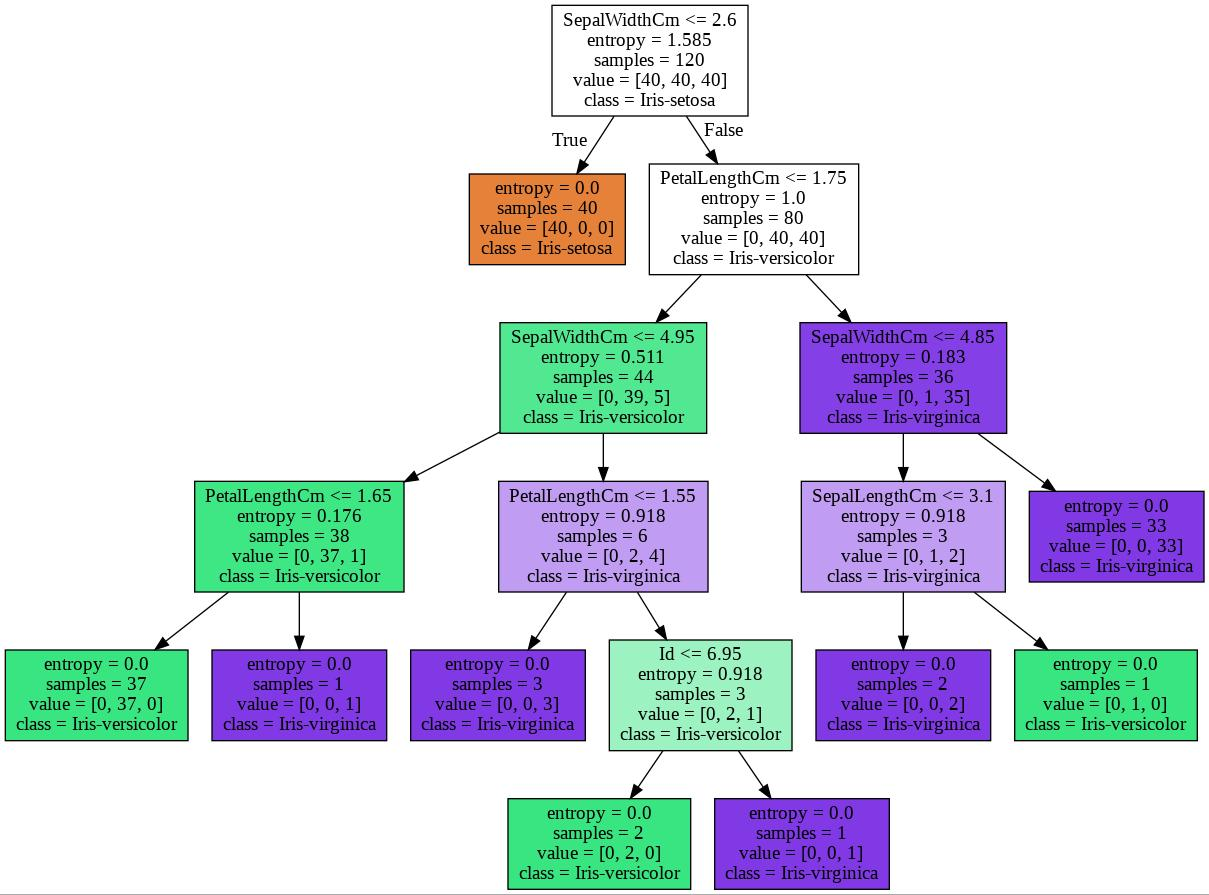

In [25]:
# save the decision tree in  gig.jpeg file 
graph.write_jpeg('gig.jpeg')

# display the dicision tree graph 
Image(graph.create_jpg())
